# Data Science 100 Final Project Report

In [10]:
#Loading the relevant R package:
library(tidyverse)
library(tidymodels)
library(repr)
library(themis)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [11]:
# load the dataframes
players<- read_csv("https://raw.githubusercontent.com/ninzyt/dsci100-project-group37/refs/heads/main/players.csv")
sessions<- read_csv("https://raw.githubusercontent.com/ninzyt/dsci100-project-group37/refs/heads/main/sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Data Description

#### Introduction
Minecraft is a 2011 sandbox game developed and published by Swedish video game developer Mojang Studios (Wikipedia contributors, 2025). And it has since been an iconic video game among many young people, ranking number 3 wolrdwide today. 

This study uses data from a UBC Computer Science research group led by Frank Wood. They had set up a MineCraft server, and recorded various player actions data as the players navigate through the server. The data contain information on the player's skill level, demographic, and play sessions. 

 #### The data consists of two files:
   1. **players.csv**: a list of data of all unique players
   2. **sessions.csv**: a list of individual play sessions by each player. 

#### Summary table #1 of `players.csv`:
- Number of variables: **7**
- Number of observations: **195**
| variable | type | meaning | # of missing observations | summary statistics (if applicable) |
|--|--|--|--|--|
|`experience`|character|The level of experience of the player (Beginner (least experienced), Amateur, Regular, Veteran, Pro (most experienced))|0|N/A|
|`subscribe`|logical|Whether subscribed to a game newsletter or not (True, or False)|0|N/A|
|`hashedEmail`|character|Private personal Email information|0|N/A|
|`played_hours`|double|The number of hours played by the player (hours)|0|Max = 223.1,   Min = 0,   Mean = 5.845918, Standard Deviation = 28.35734 |
|`name`|character|The player’s name|0|N/A|
|`gender`|character|The player’s gender (male, female, non-binary, agender, two-spirited, prefer not to say, other)|0|N/A|
|`age`|double|The player’s age (years)|2|Max = 50, Min = 8, Mean = 20.52062, Median = 19, Mode = 17, Standard Deviation = 6.174667|

**ISSUES:** 
- The `Age` variable appears to be skewed towards younger individuals, with the majority of players around the age of 20, indicating potential age bias in the data.
- The `played_hours` has many values with 0 hours and very small decimal points, so a potential conversion from hours to minutes may be necessary for a deeper and better future analysis.
-  The `played_hours` has many outliers
- session imbalance: some players have many/no sessions

#### Summary table #2 of `sessions.csv`:
- Number of variables: **5**
- Number of observations: **1534**
| variable | type | meaning | # of missing observations | summary statistics (if applicable) |
|--|--|--|--|--|
|`hashedEmail`|character|Private personal Email information|0|N/A|
|`start_time`|character|The start time, in human-readable timestamp|0|N/A|
|`end_time`|character|The end time, in human-readable timestamp|0|N/A|
|`original_start_time`|double|The start time and date of the play session in Unix time|0|Max = 1.72733e+12,   Min = 1.7124e+12,   Mean = 1.719201e+12,   Median = 1.7192e+12, Standard Deviation = 3557491589 |
|`original_end_time`|double|The end time and date of the play session in Unix time|2|Max = 1.72734e+12, Min = 1.7124e+12, Mean = 1.719196e+12, Median = 1.71918e+12, Standard Deviation = 3552813134|

**ISSUES:** 
- There are few visible issues, other than the 2 observations with missing data for both the `end_time` and `original_end_time` variable, which will need to be dealt with during later wrangling/processing.
- This should not have the issues associated with self-reported participant data, since the data is recorded by the server.
- However, since the `start_time` and `original_start_time` variables (same applies to the end time variables) contain the same information, only one is needed for each analysis, depending on needs. For example, visualizations may prefer the use of the `start_time` variable, but any modeling, etc. may benefit from the numerical format of `original_start_time`.


#### Indirect issues in the data

- The player’s `experience` is not 100% reliable as respondents could report misleading or inaccurate informations
- Bias in data collection (data only collected from mostly UBC, Canada).

## Question
**Broad Question**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question**: Can a player’s age and played hours predict their state of subscribing to a game-related newsletter?
- Only the players.csv file contain the relevant variables to answer the above predictive question.

### Data Preprocessing and Exploratory Visualization

In [12]:
# 1. Cleaning and wrangling players.csv 
players_cleaned <- players|>
                   filter(!is.na(Age))|>
                   mutate(subscribe = as.factor(subscribe))

head(players_cleaned)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [13]:
# 2. Summary statistics (mean values for each numerical variables)
players_average <- players_cleaned |>
                   summarize(min_played_hours = min(played_hours),
                             max_played_hours = max(played_hours),
                             average_played_hours = mean(played_hours),
                             min_age = min(Age),
                             max_age = max(Age),
                             median_age = median(Age),
                             mode_age = names(which.max(table(players_cleaned[[7]]))),
                             average_age = mean(Age))
players_average

min_played_hours,max_played_hours,average_played_hours,min_age,max_age,median_age,mode_age,average_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,223.1,5.904639,8,50,19,17,20.52062


**Statistics interpretation:**
- max_played_hours is much higher than average_played_hours, indicating that there may be outliers.
- We noticed that the Minecraft server used in the research autofills the default age to 17 for each player which might have caused the mode_age to be 17.
- average_age being around 20 makes sense since the research participant are mostly university students.

In [14]:
# 3. splitting dataframe into training, testing datasets
set.seed(1)
players_split <- initial_split(players_cleaned, prop = 0.75, strata = subscribe)

players_training <- training(players_split)
players_testing <- testing(players_split)

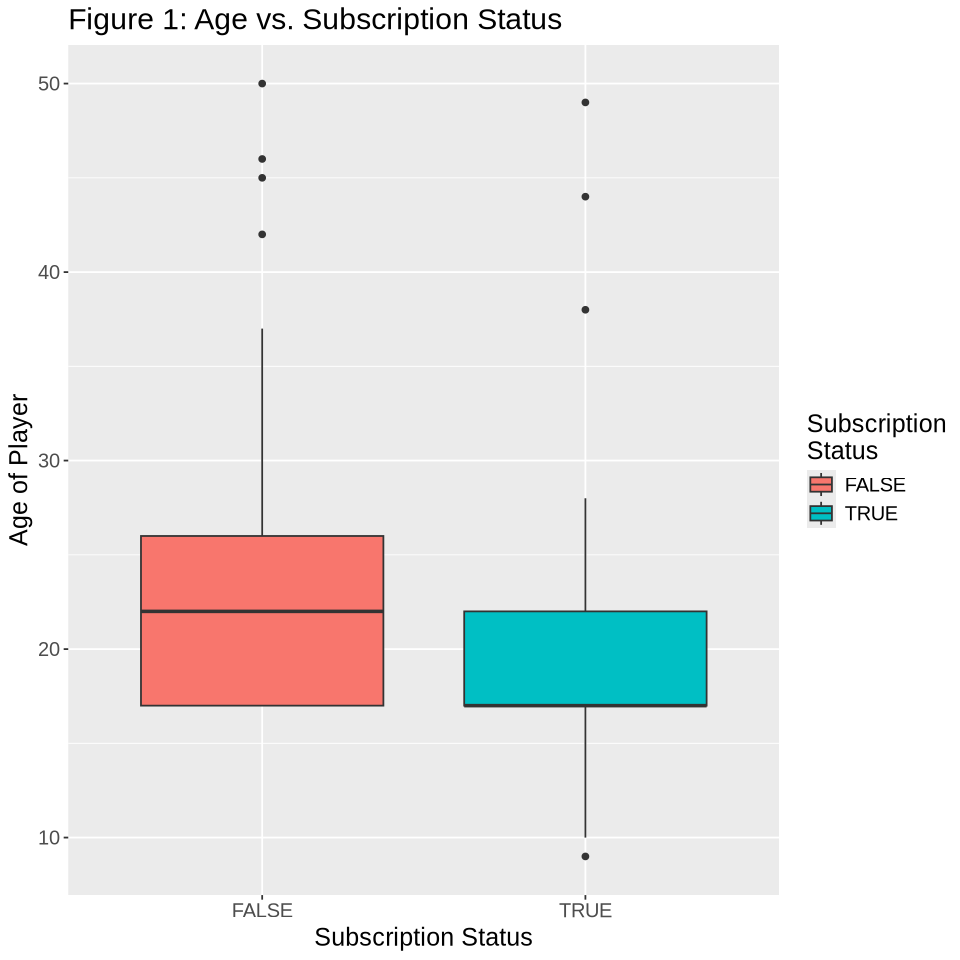

In [15]:
# 4. Exploratory visualizations
# a) finding relationships for the Age predictor:
options(repr.plot.width = 8, repr.plot.height = 8)
Age_boxplot <- ggplot(players_training, aes(x = subscribe, y = Age, fill = subscribe)) +
               geom_boxplot() +
               labs(x= "Subscription Status", y= "Age of Player", fill = "Subscription\nStatus", title = "Figure 1: Age vs. Subscription Status")+
               theme(text = element_text(size = 15))
Age_boxplot

**Plot Description**: The plot shows that players who subscribe to game-related newsletters tend to be younger, with a median age of around 17, while non-subscribers have a higher median age of approximately 22. Both groups have similar extent of age variations. There are four noticeable outliers in the non-subscriber group with significantly higher ages. This suggests that younger players may be more likely to subscribe to game-related newsletters.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


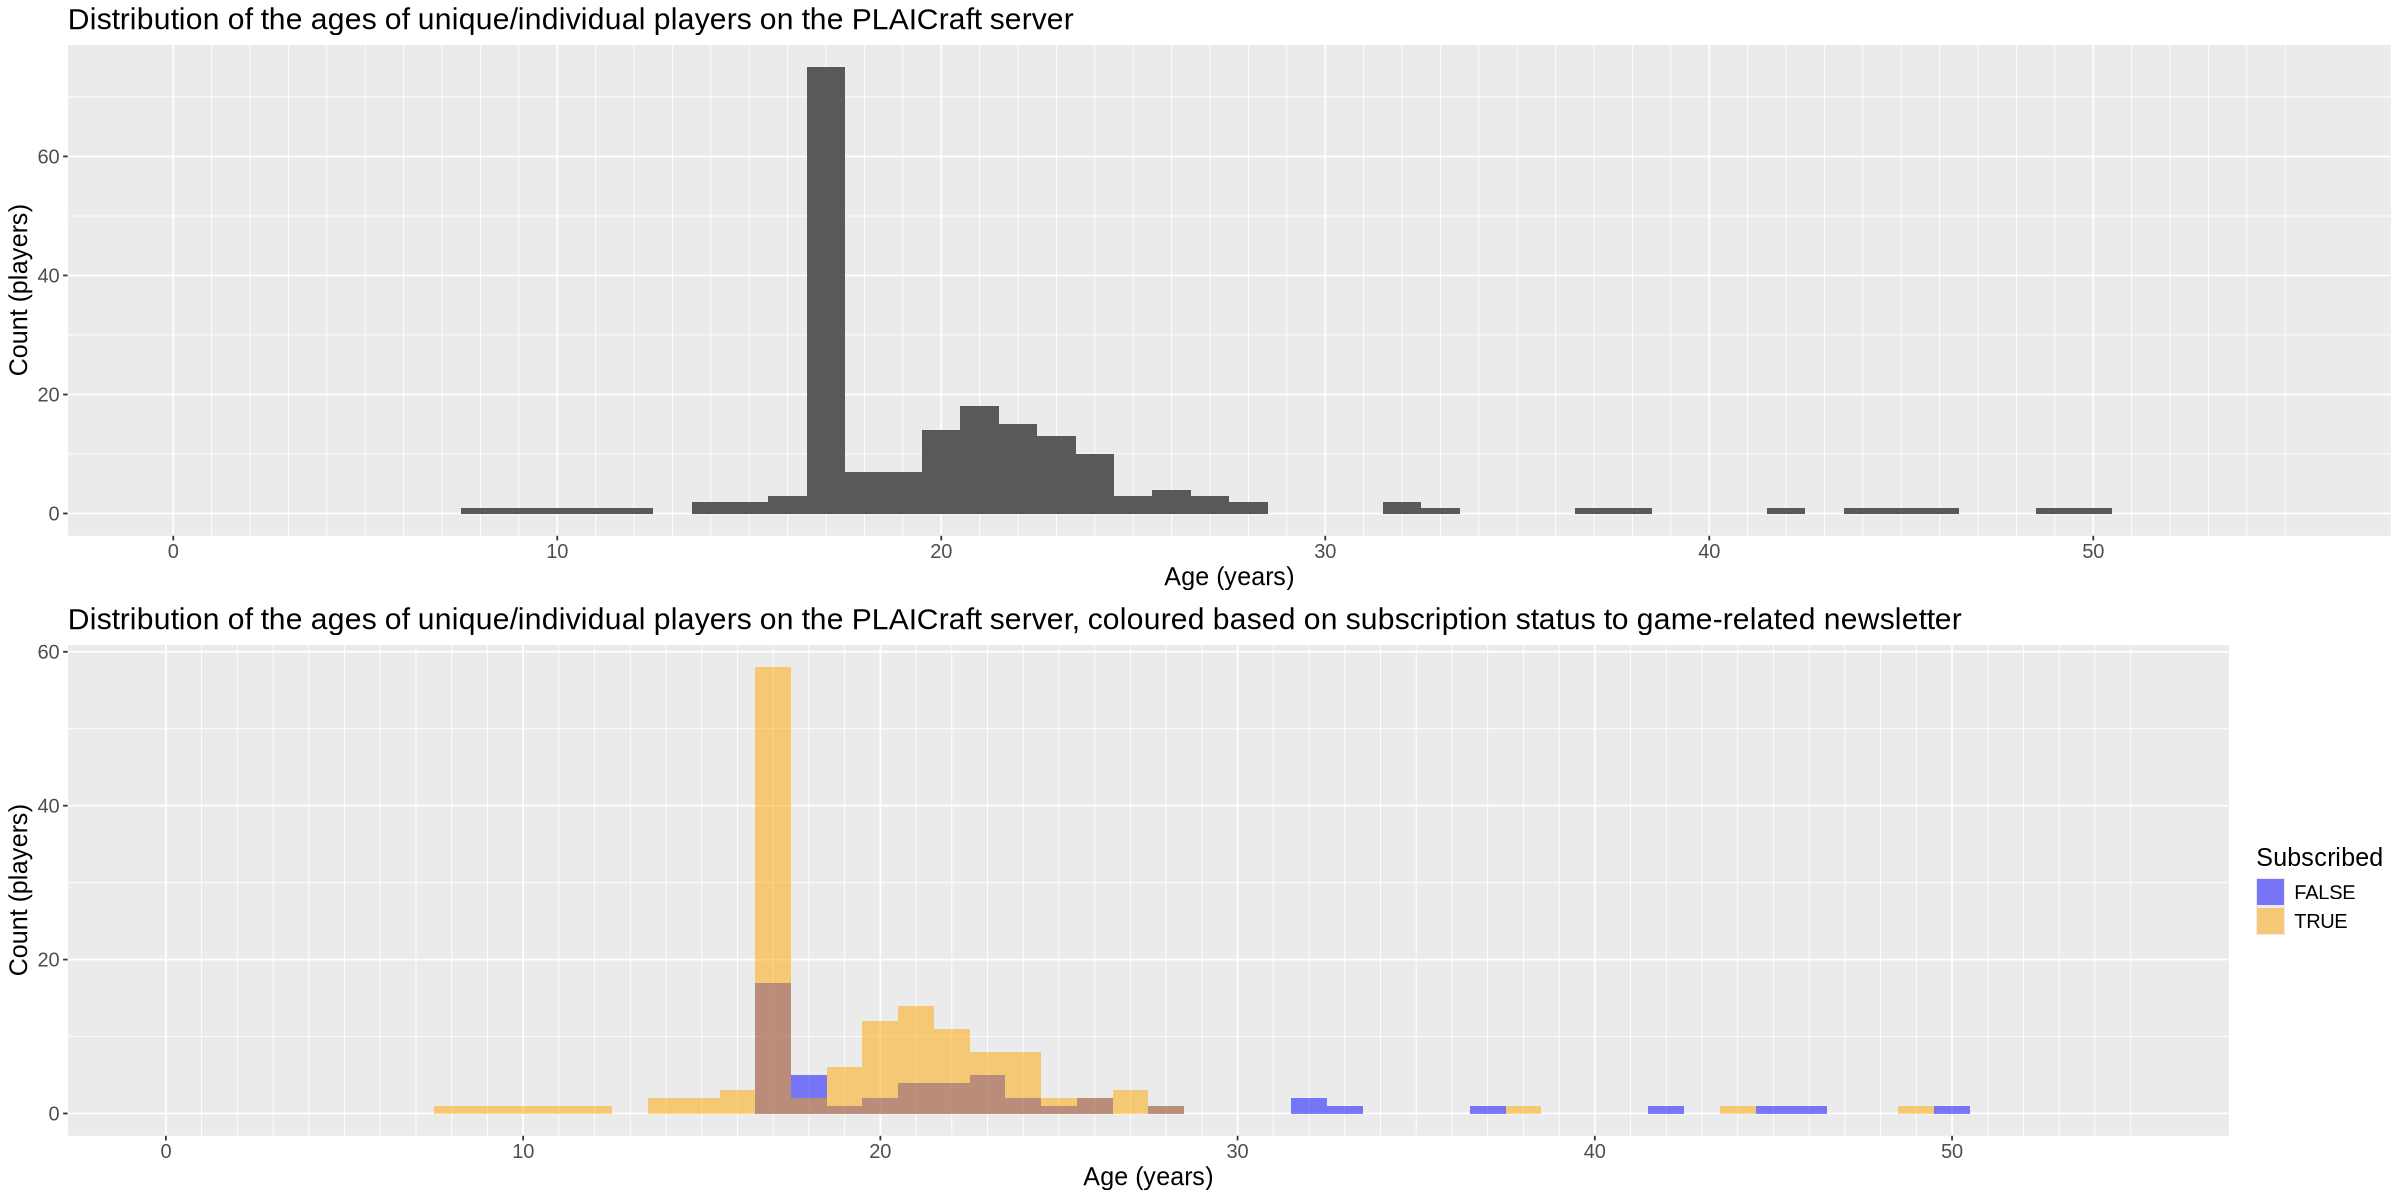

In [20]:
# 4 b) Histogram for the Age distribution 
options(repr.plot.width = 20, repr.plot.height = 10)
age_histogram <- ggplot(players, aes(x = Age)) + 
    geom_histogram(binwidth = 1) +
    scale_x_continuous(breaks = seq(0, 55, 10), minor_breaks = seq(0, 55, 1), limits = c(0, 55)) + 
    theme(text = element_text(size = 15)) + 
    labs(x = "Age (years)", y = "Count (players)") + 
    ggtitle("Distribution of the ages of unique/individual players on the PLAICraft server")

age_histogram_split <- ggplot(players, aes(x = Age, fill = subscribe)) + 
    geom_histogram(binwidth = 1, position = "identity", alpha = 0.5) +
    scale_x_continuous(breaks = seq(0, 55, 10), minor_breaks = seq(0, 55, 1), limits = c(0, 55)) + 
    theme(text = element_text(size = 15)) + 
    labs(x = "Age (years)", y = "Count (players)", fill = "Subscribed") + 
    scale_fill_manual(values = c("blue", "orange")) + 
    ggtitle("Distribution of the ages of unique/individual players on the PLAICraft server, coloured based on subscription status to game-related newsletter")
plot_grid(age_histogram, age_histogram_split, ncol = 1)

**Plot Description**: The histograms above show the distribution of the ages of individual players, both in total and split based on whether they subscribed to the newsletter. The distribution is similar for all players, or either subscription status, in that it is bimodal, with a peak around 17 and another peak around 21, with the vast majority of observations clustered around these peaks (as well as somewhat right skewed). Notably, 17 is the mode, and also the default age setting when players sign up to use the PLAICraft server. The ages range from 8 to 50 (7 is the minimum age to use PLAICraft). Interestingly, players on the higher end of the age range are often not subscribed, while all players younger than 17 are subscribed.

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 65 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


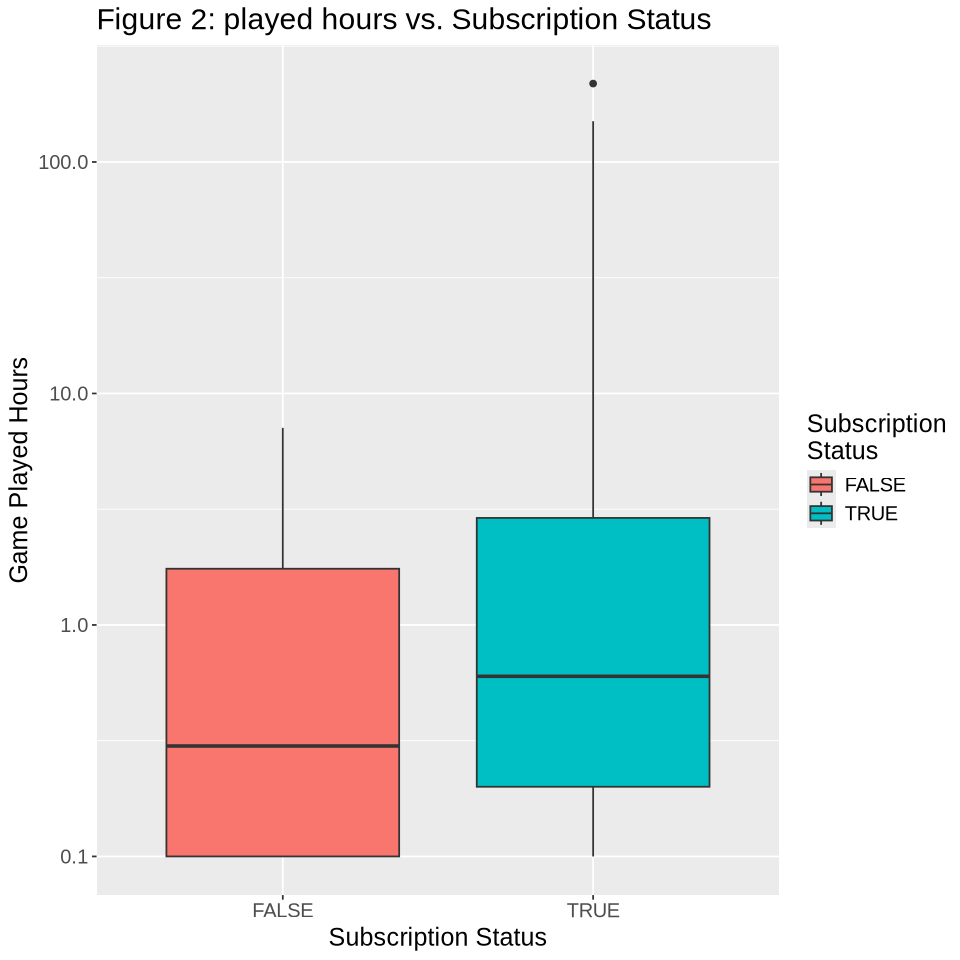

In [17]:
# 5. a) finding relationships for the played_hours predictor:
options(repr.plot.width = 8, repr.plot.height = 8)
played_hours_boxplot <- ggplot(players_training, aes(x = subscribe, y = played_hours, fill = subscribe)) +
                        geom_boxplot() +
                        scale_y_log10(labels=label_comma())+
                        labs(x = "Subscription Status", y = "Game Played Hours", fill = "Subscription\nStatus", title = "Figure 2: played hours vs. Subscription Status")+
                        theme(text = element_text(size = 15))
played_hours_boxplot

**Plot Description**: Generally, this graph suggested a potential relationship between played hours and subscription status. It is observed here that the subscribed group have a higher median played hours compared to unsubscribed group. Additionally, the subscribed group shows greater variation in played hours, with a very high outlier.

Warning message:
“Removed 15 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 15 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


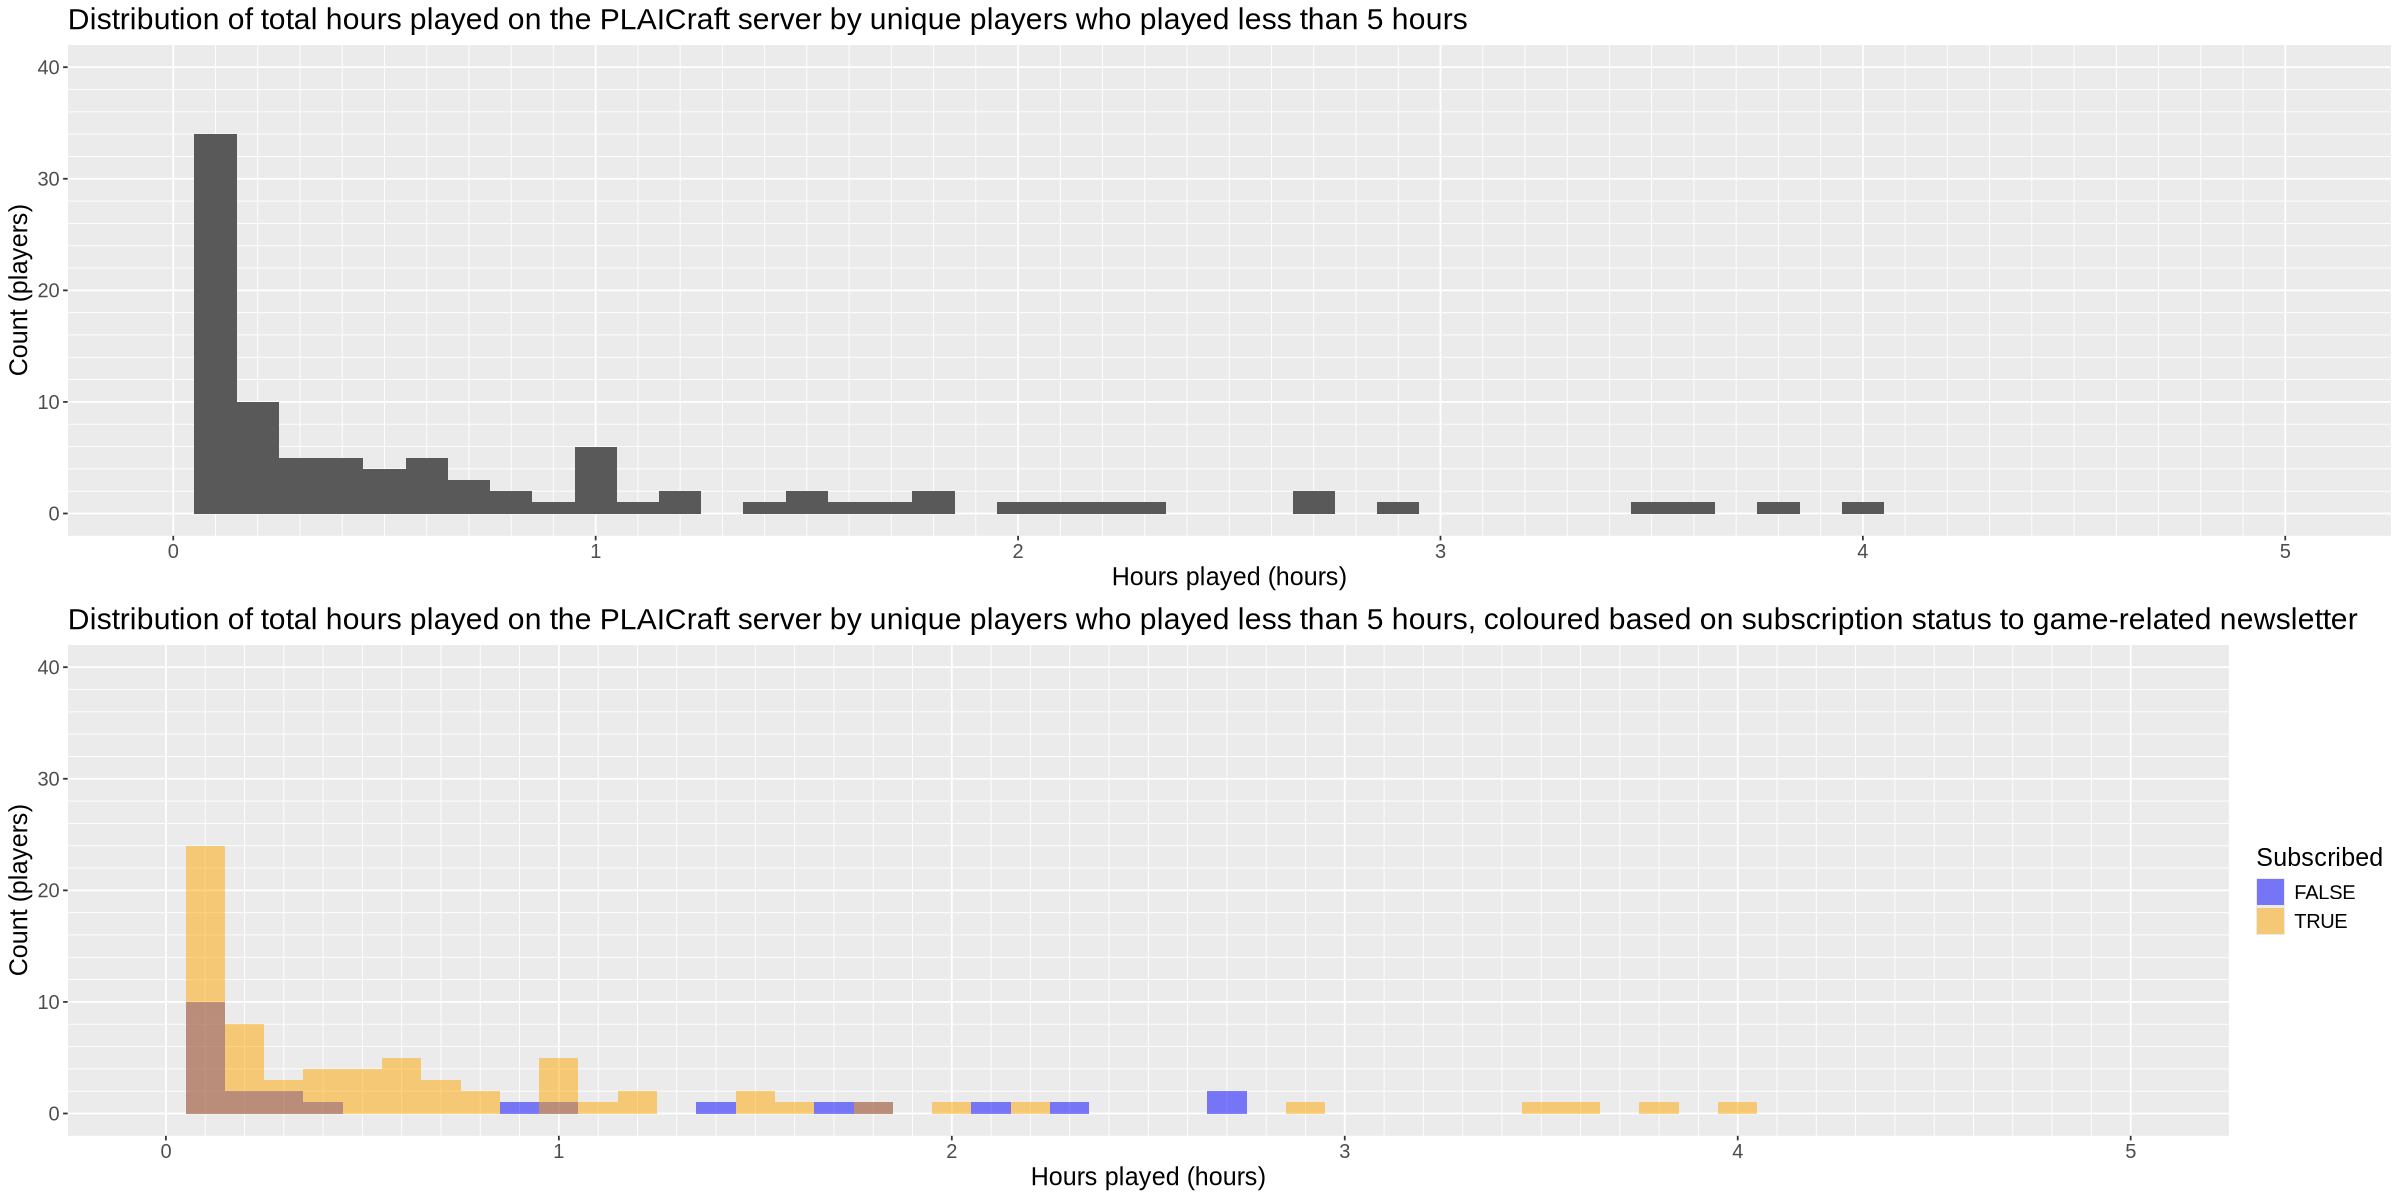

In [19]:
# 5. b) Histogram for the played_hours distribution 
options(repr.plot.width = 20, repr.plot.height = 10)
played_hours_histogram_xlimited <- ggplot(players, aes(x = played_hours)) + 
    geom_histogram(binwidth = 0.1) +
    scale_x_continuous(breaks = seq(0, 5, 1), minor_breaks = seq(0,5,0.1), limits = c(0, 5)) +
    scale_y_continuous(breaks = seq(0, 40, 10), minor_breaks = seq(0,40,2), limits = c(0, 40)) +
    theme(text = element_text(size = 15)) + 
    labs(x = "Hours played (hours)", y = "Count (players)") + 
    ggtitle("Distribution of total hours played on the PLAICraft server by unique players who played less than 5 hours")
played_hours_histogram_split_xlimited <- ggplot(players, aes(x = played_hours, fill = subscribe)) + 
    geom_histogram(binwidth = 0.1, position = "identity", alpha = 0.5) +
    scale_x_continuous(breaks = seq(0, 5, 1), minor_breaks = seq(0,5,0.1), limits = c(0, 5)) + 
    scale_y_continuous(breaks = seq(0, 40, 10), minor_breaks = seq(0,40,2), limits = c(0, 40)) +
    theme(text = element_text(size = 15)) + 
    labs(x = "Hours played (hours)", y = "Count (players)", fill = "Subscribed") + 
    scale_fill_manual(values = c("blue", "orange")) + 
    ggtitle("Distribution of total hours played on the PLAICraft server by unique players who played less than 5 hours, coloured based on subscription status to game-related newsletter")
plot_grid(played_hours_histogram_xlimited, played_hours_histogram_split_xlimited, ncol = 1)

**Plot Description**: The histograms above show that the majority of players (who played less than 5 hours) played less than 0.5 hour, and that the mode value for hours played is 0.1 hours (the minimum value present), so is still right skewed. This is true even when players are split by subscription status.

### Methods and Plan
#### Method to use: Classification by K-nearest neighbors (KNN) classification algorithms
Why choose this method?
- Classification is appropriate for this predictive question as the question requires using given data on `played_hours` and `Age` to determine the class `subscribe` of a new sample.
- KNN classification algorithm does not require specific data or shape assumptions for the algorithm to perform well, since it is based on how close a new sample is to nearby points.

Model Application:

- Model comparison and selection will be done through cross-validation.
- The function `initial_split()` was used to split the dataframe into 75% training and 25% testing data, stratifying for `subscribe`. The data need to be splitted before applying KNN analysis so the testing data will be "untouched". 
- Cross-validation will be used to asses the model's performance. The k-folds will likely be 5, or 10-folds as higher k-folds increase cost. Additionally, tuning the model to determine the best K value will help maximize the accuracy of the classifier on new observations.  

Potential Limitations:

- KNN is very sensitive to scaling. If the ranges of values for `played_hours` and `Age` differ by a lot, biased neighbors will be chosen due to biased Euclidean distance, thus resulting in inaccurate prediction.
- Imbalance. If there are a lot more subscribed observations than unsubscribed, KNN will more likely to classify any new observations as subscribe, which is inaccurate.


### Data Analysis

In [8]:
# 6. Preparing the recipe using only the training data. The data is standardized and upsampled to resolve data imbalance issues. 
players_recipe<- recipe(subscribe~Age+played_hours, data=players_training)|>
step_scale(all_predictors())|>
step_center(all_predictors()) |>
step_upsample(subscribe, over_ratio = 1)

In [9]:
# 7. a) Cross-validation and Parameter (K) Value Selection
players_vfold<- vfold_cv(players_training, v=5, strata=subscribe)
players_spec_tune<- nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

k_vals<- tibble(neighbors=seq(from=1, to=100, by=1))

player_tune_results<- workflow()|>
add_recipe(players_recipe)|>
add_model(players_spec_tune)|>
tune_grid(resamples=players_vfold, grid=k_vals)|>
collect_metrics()

accuracy<- player_tune_results|>
filter(.metric=="accuracy")

[1] 89

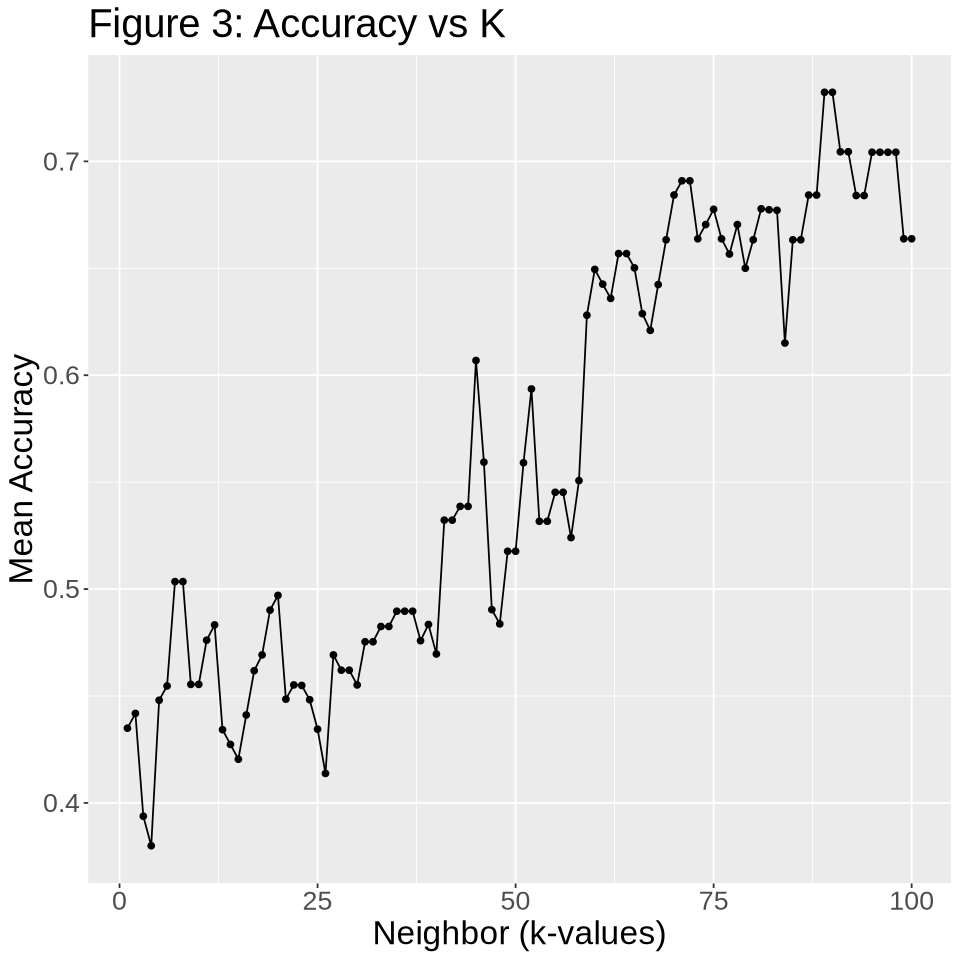

In [50]:
# 7. b) Best K value visualization and determination 
accuracy_vis_k<- ggplot(accuracy, aes(x=neighbors, y=mean))+
geom_point()+
geom_line() +
labs(x = "Neighbor (k-values)",
     y = "Mean Accuracy",
     title = "Figure 3: Accuracy vs K")+
theme(text = element_text(size = 20))
accuracy_vis_k

best_k_val<- filter(accuracy, mean==max(mean)) |>
filter(neighbors == min(neighbors))|>
pull(neighbors)
best_k_val

In [16]:
# 8. a) Evaluate the tuned classifier on the testing data.
test_try_spec<- nearest_neighbor(weight_func = "rectangular", neighbors=best_k_val)|>
set_engine("kknn")|>
set_mode("classification")

test_fit<- workflow() |>
  add_recipe(players_recipe) |>
  add_model(test_try_spec) |>
  fit(data = players_training)

test_predictions <- predict(test_fit, players_testing) |>
  bind_cols(players_testing)

In [16]:
# 8. b) Assessing the estimated accuracy, precision and recall, and print a confusion matrix.

test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level="second")

test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level="second")
head(test_predictions)

confusion <- test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5306122


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7241379


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5833333


.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
TRUE,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
TRUE,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
TRUE,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
TRUE,Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
FALSE,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
FALSE,Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22


          Truth
Prediction FALSE TRUE
     FALSE     5   15
     TRUE      8   21

### Discussion

#### Summary of Results:

* **Accuracy = 0.53**
  
    Our classifier was approximately 53% accurate, and labeled 26 out of 49 observations correctly.
    This is a relatively low accuracy, since the classifier is only predicting the correct label around half the time, similar to what would be achieved via simple random guessing.

* **Precision = 0.777**

  
     When the model predicts that someone will subscribe, it is right about 77.7% of the time. This is relatively high, so while it doesn’t find all the subscribers, the ones it does predict are likely correct. This is good for resource planning: if you act on its prediction, you're less likely to waste resources.


* **Recall = 0.388**

     The model only identifies 38.8% of the people who actually subscribe. In other words, it misses more than half of the true subscribers. This could lead to under-preparing infrastructure or missing outreach opportunities.


#### Expected Findings vs. Outcome:
The classifier showed relatively low accuracy and recall, which was expected from the exploratory analyses. The exploratory visualization comparing age to played hours showed a high degree of overlap between players who did/didn’t subscribe. In other words, the majority of data points were located in a region where a similar proportion of their neighbours belonged to either class, which would make it difficult for the model to predict the subscription status. 

#### Impacts of These findings:

**1. Recruitment Efforts:**

Since the model has low recall, it's likely missing many people who would actually subscribe. This means the research team might not reach enough participants, or could overlook players who would’ve been great additions to the study. In the long run, this might lead to a smaller or less diverse player base, which could limit the insights they’re hoping to gain from the data.

**2. Resource Allocation (licenses, server capacity):**

The model has strong precision, so when it says someone will subscribe, it's usually right. This helps the team confidently prepare enough licenses or server space for those predicted users. But because a lot of real subscribers may be missed, there’s still a risk of sudden demand from unexpected players. Having some extra resources or a flexible setup could help handle that uncertainty.

#### Future Questions:


**Question 1:**  
Can we improve recall without sacrificing precision too much?  
  Might involve adding more features (e.g., game behavior logs, in-game time of day, type of activity) or using more complex models.

**Question 2:**  
Are there patterns among the players who were missed (false negatives)?  
  Understanding them could improve outreach strategies or reveal underrepresented player types.


### References

Wikipedia contributors. (2025, April 2). Minecraft. In Wikipedia, The Free Encyclopedia. https://en.wikipedia.org/w/index.php?title=Minecraft&oldid=1283605041